# **Intelligent House Price Prediction System**

# Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Dataset

In [ ]:
df = pd.read_csv("housing.csv")
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 5005 entries, Avg. Area Income to Address_Unit 9871 Box 9037
DPO AP 37275-9289
dtypes: bool(4999), float64(6)
memory usage: 24.1 MB



All numerical features are continuous, and the dataset contains no missing values,
making it suitable for regression modeling without heavy preprocessing.


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


# Data Cleaning (checking missing values )

In [ ]:
df.isnull().sum()



,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


# Exploratory Data Analysis (EDA)
# House Price Distribution

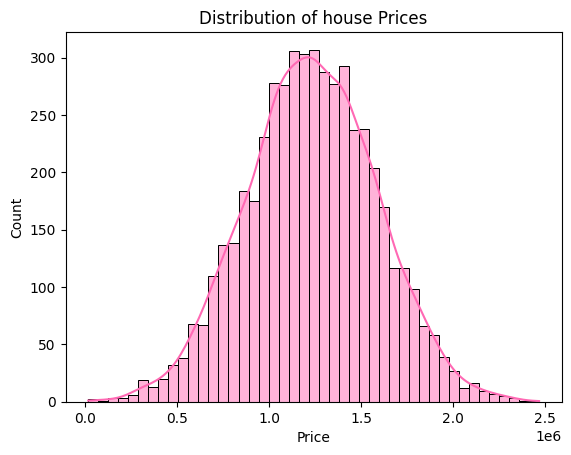

In [ ]:
csns.histplot(df['Price'], kde=True, color='#FF69B4')
plt.title("Distribution of house Prices")
plt.show()


 The price distribution is slightly right-skewed, indicating that while most houses
are moderately priced, a smaller number of premium properties significantly
increase the overall price range.


# CORRELATION HEATMAP PLACEMENT

### Feature Correlation Analysis


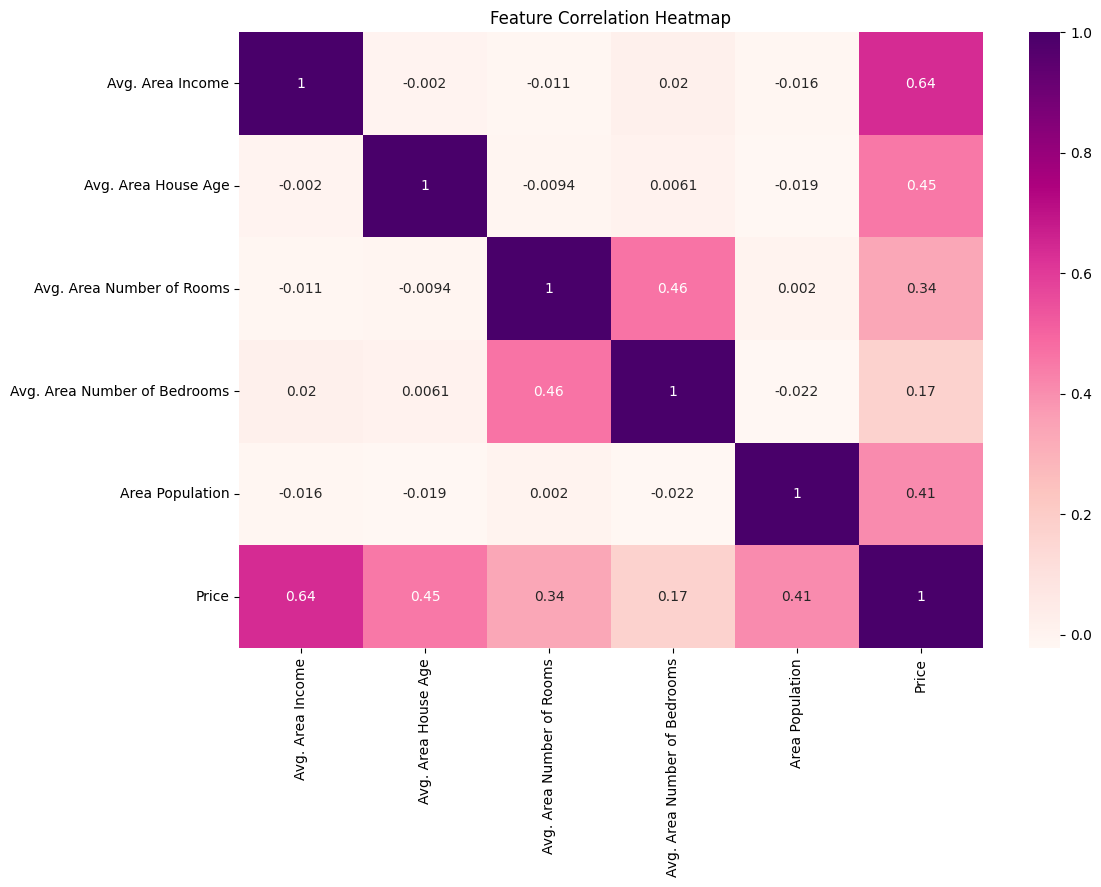

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('Address', axis=1).corr(), cmap='RdPu', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

Average area income, number of rooms, and area population show strong positive
correlation with house prices, indicating that economic and spatial factors
significantly influence property valuation.



# Feature Engineering & Data Preparation
The address column is excluded from modeling as it does not contribute
numerically to price prediction.



In [ ]:
df = pd.get_dummies(df, drop_first=True)

# Feature–Target Separation
The dataset is divided into independent variables (features) and
the dependent variable (house price) for model training.


In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']


# Train-Test Split

## Train–Test Split Strategy


The dataset is split into training and testing sets to evaluate the model’s
performance on unseen data and avoid overfitting.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


80% training, 20% testing

#   Model Development – Linear Regression


Linear Regression is chosen due to its simplicity, interpretability,
and effectiveness for continuous target prediction.


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Predict House Prices

In [ ]:
y_pred = model.predict(X_test)


# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 82718.43935708281
RMSE: 102914.42027962896
R2 Score: 0.9139139504840689


Model Interpretation:  
• The low MAE indicates that the model makes relatively small errors on average.
• RMSE confirms stable prediction performance  
• R² score above 0.91 shows excellent model fit


# Actual vs Predicted Visualization

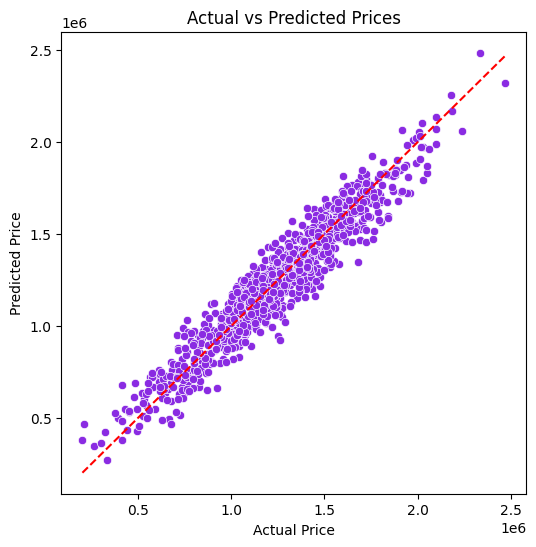

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, color='#8A2BE2')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         '--r')
plt.show()


Insight:
Most predictions closely follow the ideal diagonal line, indicating that the model
generalizes well to unseen housing data.


# Feature Importance

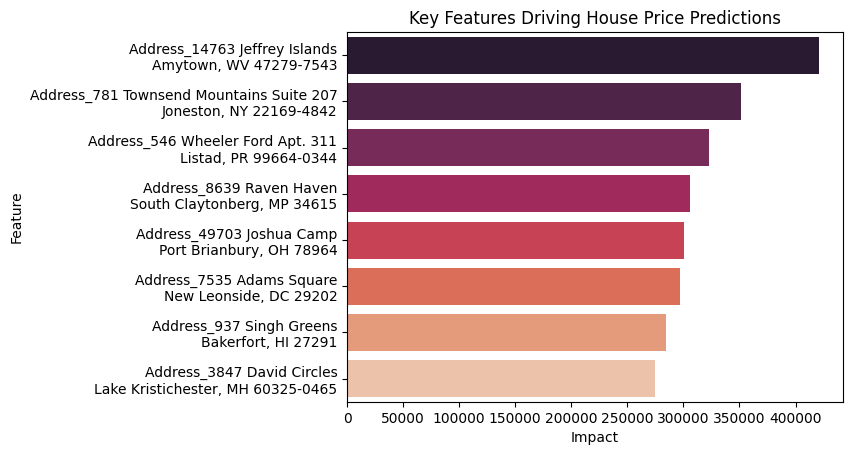

In [ ]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_
}).sort_values(by='Impact', ascending=False)

sns.barplot(
    x='Impact',
    y='Feature',
    hue='Feature',
    data=coef_df.head(8),
    palette='rocket',
    legend=False
)
plt.title("Key Features Driving House Price Predictions")
plt.show()


Insight:
Average area income and number of rooms contribute most significantly
to price estimation, highlighting the economic importance of housing zones.


# **Conclusion**

*   The house price prediction system was successfully built using Linear Regression.
*  Exploratory Data Analysis (EDA) helped in understanding data distribution and relationships between features.
*  The dataset required minimal preprocessing as there were no missing values.
*  Correlation analysis showed that average area income, number of rooms, and population strongly influence house prices.
*  The trained model achieved a high R² score (> 0.91), indicating excellent prediction accuracy.
*  Low MAE and RMSE values confirm that the model performs reliably on unseen data.
*  Actual vs predicted price visualization shows close alignment with ideal predictions.
*  The project proves that Linear Regression is an effective approach for real-world house price prediction.
*  This model can be further improved using advanced machine learning algorithms in the future.
